# Download flower 

In [1]:
import os

url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
filename = url.split('/')[-1]

download_dir = 'datasets/flowers'
file_path = os.path.join(download_dir, filename)

In [2]:
def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

In [3]:
import os
import urllib.request
import zipfile
import tarfile

if not os.path.exists(file_path):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    print("Downloading", filename, "...")
    file_path, _ = urllib.request.urlretrieve(url=url,
                                              filename=file_path,
                                              reporthook=download_progress)
    print("Done.")
    
    print("Extracting files.")
    if file_path.endswith(".zip"):
        zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
    elif file_path.endswith((".tar.gz", ".tgz")):
        tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)
    print("Done.")

In [4]:
if os.path.exists(file_path):
    print("Data has apparently already been downloaded and unpacked.")

Data has apparently already been downloaded and unpacked.


# Create flower_classes list

In [5]:
FLOWERS_PATH = os.path.join("datasets", "flowers")
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")

In [6]:
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])

In [7]:
print(flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Create image_paths dict 

In [8]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [9]:
print(type(image_paths))

<class 'collections.defaultdict'>


In [10]:
print(type(image_paths['daisy']))

<class 'list'>


In [11]:
for cls in flower_classes:
    print(image_paths[cls][0:3])
    image_paths[cls].sort()
    print(image_paths[cls][0:3])

['datasets/flowers/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg', 'datasets/flowers/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg', 'datasets/flowers/flower_photos/daisy/476857510_d2b30175de_n.jpg']
['datasets/flowers/flower_photos/daisy/100080576_f52e8ee070_n.jpg', 'datasets/flowers/flower_photos/daisy/10140303196_b88d3d6cec.jpg', 'datasets/flowers/flower_photos/daisy/10172379554_b296050f82_n.jpg']
['datasets/flowers/flower_photos/dandelion/9965757055_ff01b5ee6f_n.jpg', 'datasets/flowers/flower_photos/dandelion/461632542_0387557eff.jpg', 'datasets/flowers/flower_photos/dandelion/4572738670_4787a11058_n.jpg']
['datasets/flowers/flower_photos/dandelion/10043234166_e6dd915111_n.jpg', 'datasets/flowers/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg', 'datasets/flowers/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg']
['datasets/flowers/flower_photos/roses/16209331331_343c899d38.jpg', 'datasets/flowers/flower_photos/roses/5777669976_a205f61e5b.jpg', 'datasets/flowers/flowe

In [12]:
import matplotlib.image as mpimg
import numpy as np

n_examples_per_class = 2

for flower_class in flower_classes:
    for i in range(n_examples_per_class):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        msg = 'class: {:>10s}, max: {}, min: {}'
        print(msg.format(flower_class, np.max(example_image), np.min(example_image)))

class:      daisy, max: 238, min: 0
class:      daisy, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:      roses, max: 255, min: 0
class:      roses, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class:     tulips, max: 255, min: 0
class:     tulips, max: 255, min: 0


Class: daisy


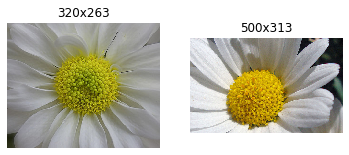

Class: dandelion


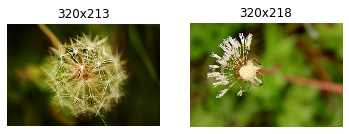

Class: roses


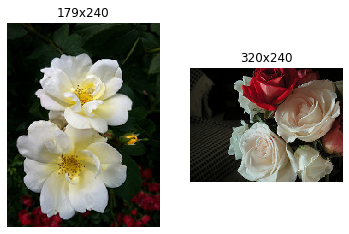

Class: sunflowers


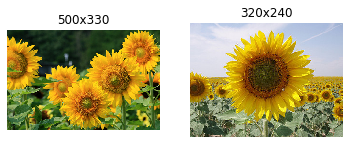

Class: tulips


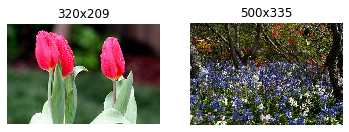

In [13]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

n_examples_per_class = 5

for flower_class in flower_classes:
    print("Class:", flower_class)
    fig, axes = plt.subplots(1, 2)
    for i, ax in enumerate(axes):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        ax.set_title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        ax.imshow(example_image)
        ax.axis("off")
    plt.show()

# Random Cropping

In [14]:
from skimage.transform import resize
import numpy as np

def prepare_image(image, target_width=299, target_height=299, max_zoom=0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box size that fits within the image
    height, width = image.shape[0], image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # Now let's shrink this bounding box by a random factor
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # Next, we can select a random location on the image for this bounding box.
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    image = image[y0:y1, x0:x1] # crop the image
    if np.random.rand() < 0.5: image = np.fliplr(image) # fliplr with 50% probability

    # Now, let's resize the image to the target dimensions.
    # scikit-image will automatically transform the image to floats ranging from 0.0 to 1.0
    image = resize(image, (target_width, target_height))

    return image.astype(np.float32) # represented as 32-bit floats

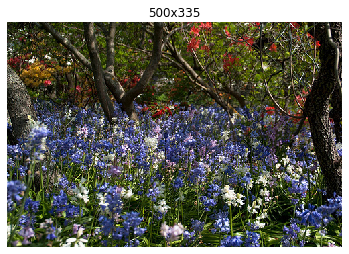

In [15]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

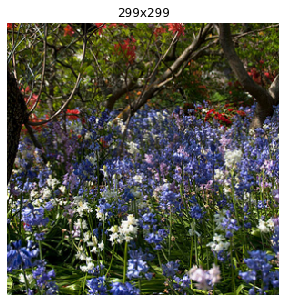

In [16]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(5, 5))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

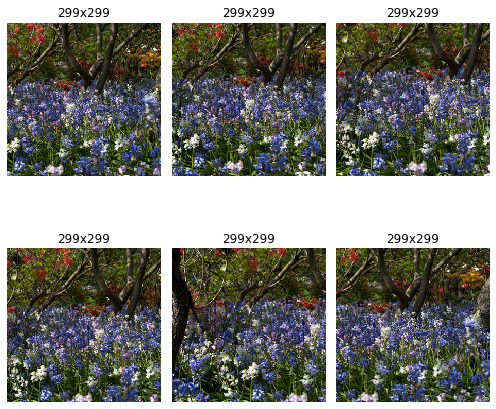

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(7, 7))
for ax in axes.reshape((-1,)):
    prepared_image = prepare_image(example_image)
    ax.set_title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
    ax.imshow(prepared_image)
    ax.axis("off")
plt.tight_layout()
plt.show()

# Random Cropping with TensorFlow

In [18]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [19]:
def pre_process_tf(image, training):
    """Zooms and crops the image randomly for data augmentation."""
    image = image / 255.
    
    target_height = 299
    target_width = 299
    num_channels = 3
    
    if training:

        # Randomly crop the input image.
        image = tf.random_crop(image, size=[target_height, target_width, num_channels])

        # Randomly flip the image horizontally.
        image = tf.image.random_flip_left_right(image)
        
        # Randomly adjust hue, contrast and saturation.
#         image = tf.image.random_hue(image, max_delta=0.05)
#         image = tf.image.random_contrast(image, lower=0.3, upper=1.0)
#         image = tf.image.random_brightness(image, max_delta=0.2)
#         image = tf.image.random_saturation(image, lower=0.0, upper=2.0)

        # Limit the image pixels between [0, 1] in case of overflow.
        image = tf.minimum(image, 1.0)
        image = tf.maximum(image, 0.0)
        
    else:
        # Crop the input image around the centre so it is the same
        # size as images that are randomly cropped during training.
        image = tf.image.resize_image_with_crop_or_pad(image,
                                                       target_height=target_height,
                                                       target_width=target_width)
    return image

In [20]:
x = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='x')
distorted_images = tf.map_fn(lambda img: pre_process_tf(img, training=True), x)
resized_images = tf.map_fn(lambda img: pre_process_tf(img, training=False), x)

(1, 299, 299, 3) 1.0 0.0


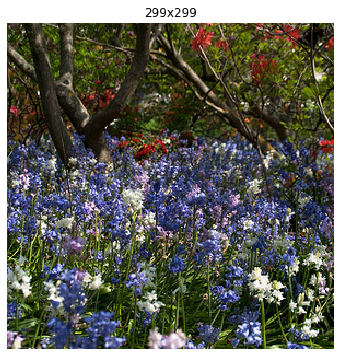

In [21]:
with tf.Session():
    feed_dict = {x: example_image[None,:,:,:]}
    imgs = resized_images.eval(feed_dict=feed_dict)
    print(imgs.shape, np.max(imgs), np.min(imgs))
    
plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(imgs))
plt.title("{}x{}".format(imgs.shape[2], imgs.shape[1]))
plt.axis("off")
plt.show()

(1, 299, 299, 3) 1.0 0.0


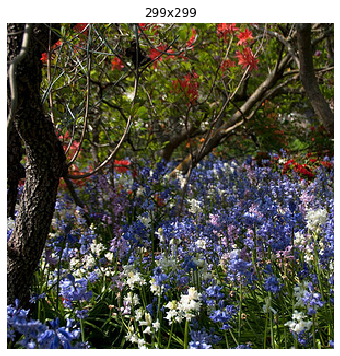

In [22]:
with tf.Session():
    feed_dict = {x: example_image[None,:,:,:]}
    imgs = distorted_images.eval(feed_dict=feed_dict)
    print(imgs.shape, np.max(imgs), np.min(imgs))
    
plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(imgs))
plt.title("{}x{}".format(imgs.shape[2], imgs.shape[1]))
plt.axis("off")
plt.show()

# Inception v3 Download

In [23]:
%matplotlib inline
import urllib.request
import tarfile
import zipfile
import os
import sys

In [24]:
def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

In [25]:
url = 'http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz'
filename = url.split('/')[-1]

download_dir = 'model/inception/'
file_path = os.path.join(download_dir, filename)

In [26]:
if not os.path.exists(file_path):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    print("Downloading", filename, "...")
    file_path, _ = urllib.request.urlretrieve(url=url,
                                              filename=file_path,
                                              reporthook=download_progress)
    print("Done.")
    
    print("Extracting files.")
    if file_path.endswith(".zip"):
        zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
    elif file_path.endswith((".tar.gz", ".tgz")):
        tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)
    print("Done.")

In [27]:
if os.path.exists(file_path):
    print("Data has apparently already been downloaded and unpacked.")

Data has apparently already been downloaded and unpacked.


# Restore Graph

In [28]:
import numpy as np
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

In [29]:
epoch = 40
batch_size = 40
lr = 1e-3

In [30]:
# def map_pre_process_train(placeholder):
#     return tf.map_fn(lambda img: pre_process_tf(img, training=True), placeholder)

# def map_pre_process_test(placeholder):
#     return tf.map_fn(lambda img: pre_process_tf(img, training=False), placeholder)

In [31]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

graph = tf.Graph()
with graph.as_default(): 
    x = tf.placeholder(tf.float32, shape=[None, 299, 299, 3])
    with slim.arg_scope(inception.inception_v3_arg_scope()):
        logits_inception_v3, end_points = inception.inception_v3(
            x, num_classes=1001, is_training=False)
    saver_inception_v3 = tf.train.Saver()    
    
    prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])
    x2 = tf.layers.dense(prelogits, 100, activation=tf.nn.elu)
    x3 = x2 = tf.layers.dense(x2, 100, activation=tf.nn.elu)
    logits = tf.layers.dense(x3, 5, activation=None)
    y = tf.placeholder(tf.float32, shape=[None, 5]) 
    y_cls = tf.placeholder(tf.int32, shape=[None,]) 
    entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
    loss = tf.reduce_mean(entropy)
    
    opt = tf.train.AdamOptimizer(lr)
    #print([v.name for v in tf.trainable_variables()])
    var_list = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)[-6:]
    #print(type(var_list))
    #print(len(var_list))
    #print(var_list)
    train = opt.minimize(loss, var_list=var_list)
     
    correct = tf.nn.in_top_k(logits, y_cls, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    init = tf.global_variables_initializer()
    saver = tf.train.Saver() 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.


In [32]:
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [33]:
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [34]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [35]:
flower_paths_and_classes_train[:3]

[('datasets/flowers/flower_photos/daisy/19834392829_7d697871f6.jpg', 0),
 ('datasets/flowers/flower_photos/sunflowers/5957007921_62333981d2_n.jpg', 3),
 ('datasets/flowers/flower_photos/tulips/7166635566_ee240b5408_n.jpg', 4)]

In [36]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size, channels=3):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = np.stack(prepared_images) # My Inception Code expects colors ranging from 0 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, np.eye(5)[y_batch], y_batch

In [37]:
X_batch, y_batch, y_batch_cls = prepare_batch(flower_paths_and_classes_train, batch_size=100)
print(X_batch.shape, y_batch.shape, y_batch_cls.shape)

(100, 299, 299, 3) (100, 5) (100,)


In [38]:
x_test = [mpimg.imread(path)[:, :, :3] 
                   for path, labels in flower_paths_and_classes_test]
x_test = [prepare_image(image) for image in x_test]
x_test = np.stack(x_test)
y_test_cls = np.array([labels 
                       for path, labels in flower_paths_and_classes_test], dtype=np.int32)
y_test = np.eye(5)[y_test_cls]

In [39]:
INCEPTION_PATH = os.path.join("model", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

In [40]:
with tf.Session(graph=graph) as sess:
    saver_inception_v3.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    
    if 0:
        last_saved_epoch = 29
        saver.restore(sess, "./save/my_model_epoch_{}.ckpt".format(str(last_saved_epoch)))
    else:
        last_saved_epoch = -1
        init.run()

    loss_trace = []
    
    for i in range(last_saved_epoch+1,epoch):
        print("Epoch", i, end=" ")
        for _ in range(len(flower_paths_and_classes_train) // batch_size):
            x_batch, y_batch, y_batch_cls = prepare_batch(flower_paths_and_classes_train, batch_size)
            feed_dict = {x:x_batch, y:y_batch, y_cls:y_batch_cls}
            loss_run, accuracy_run, _ = sess.run([loss, accuracy, train], feed_dict=feed_dict)
            loss_trace.append(loss_run)
            print(loss_run, accuracy_run)
        #print(end='\n')
        print(end=' ')
        saver.save(sess, "./save/my_model_epoch_{}.ckpt".format(str(i)))
        
    saver.save(sess, './save/my-model_final.ckpt')

INFO:tensorflow:Restoring parameters from model/inception/inception_v3.ckpt
Epoch 0 1.6435616 0.225
1.9805759 0.25
2.163411 0.2
1.8133408 0.225
2.0473232 0.125
1.6734514 0.175
1.8562962 0.125
1.8174028 0.2
1.7679065 0.15
1.6293561 0.25
1.6947305 0.125
1.5887378 0.375
1.7202837 0.225
1.655418 0.35
1.6564316 0.3
1.8786907 0.15
1.644042 0.275
1.6807451 0.2
1.5525894 0.4
1.6674694 0.2
1.5952837 0.325
1.6074688 0.25
1.7217306 0.175
1.5811479 0.275
1.5675322 0.25
1.5796435 0.25
1.6519477 0.25
1.5879412 0.275
1.7267132 0.2
1.6380619 0.125
1.591932 0.275
1.6790596 0.15
1.6336005 0.225
1.5494831 0.35
1.6125282 0.225
1.5790213 0.25
1.5660149 0.25
1.6383922 0.275
1.5901653 0.25
1.5273464 0.175
1.785063 0.2
1.5912907 0.2
1.5587786 0.425
1.5956482 0.225
1.6329012 0.225
1.6789684 0.2
1.8785397 0.1
1.6816295 0.1
1.5872437 0.225
1.5724293 0.2
1.4825792 0.275
1.4637139 0.425
1.8386452 0.225
1.9892166 0.25
1.5369123 0.45
1.5146551 0.425
1.5611115 0.325
1.6191361 0.175
1.5475779 0.475
1.5545166 0.3
1.613

 Epoch 7 1.3958929 0.375
1.4122722 0.35
1.4446393 0.325
1.3946744 0.5
1.2823418 0.475
1.2491026 0.475
1.30483 0.425
1.2652293 0.425
1.38272 0.35
1.4665232 0.25
1.2803829 0.5
1.264546 0.575
1.2495755 0.525
1.3514054 0.375
1.3599507 0.35
1.5180452 0.35
1.4314306 0.35
1.2860887 0.5
1.3497585 0.5
1.1058769 0.525
1.336656 0.45
1.2147425 0.525
1.2320747 0.4
1.3419135 0.45
1.2539189 0.525
1.2262926 0.55
1.3115032 0.45
1.5140417 0.3
1.3522298 0.375
1.2596343 0.475
1.4181486 0.275
1.1847808 0.55
1.375886 0.45
1.3000655 0.45
1.3525584 0.575
1.2846601 0.475
1.3993403 0.4
1.3522625 0.425
1.3511591 0.375
1.388731 0.325
1.5001704 0.375
1.2632554 0.425
1.3098547 0.45
1.3147169 0.45
1.4968538 0.375
1.3246906 0.475
1.3275656 0.4
1.3097525 0.425
1.2987715 0.5
1.4382616 0.35
1.227495 0.425
1.3391014 0.45
1.3729537 0.45
1.2632878 0.5
1.2790086 0.525
1.3896741 0.4
1.1871808 0.5
1.3790938 0.4
1.3107893 0.375
1.5284325 0.375
1.4444362 0.35
1.2526002 0.55
1.2632902 0.475
1.3164482 0.375
1.4367479 0.35
1.32390

1.2561467 0.45
1.6058228 0.35
1.5943601 0.3
1.1693064 0.575
1.3142961 0.5
1.1748133 0.475
1.3245685 0.5
1.3718891 0.45
1.110019 0.525
1.4732021 0.4
1.2288662 0.525
1.2635399 0.575
1.2688414 0.45
1.2155068 0.5
1.3522278 0.5
1.2911478 0.425
1.274771 0.4
1.1320717 0.475
1.3269558 0.4
1.4408791 0.425
1.2220827 0.375
1.4097822 0.5
1.3073244 0.425
1.2442541 0.65
1.3001684 0.55
1.2184471 0.525
1.0222498 0.575
1.26329 0.5
1.2509159 0.475
1.2162021 0.65
1.2099044 0.5
1.2436073 0.475
1.1823488 0.55
1.4031426 0.475
1.3789927 0.4
1.0346032 0.625
1.3671427 0.4
1.122242 0.575
1.296006 0.425
1.2372055 0.65
1.061034 0.6
1.181047 0.525
1.2110103 0.475
1.16267 0.525
1.0039473 0.625
1.2815384 0.475
1.2132488 0.45
1.2948878 0.4
1.2260029 0.425
 Epoch 15 1.1352268 0.525
1.1815667 0.425
1.2298696 0.55
0.9378454 0.6
1.3289936 0.425
1.1070287 0.55
1.223011 0.475
1.3891494 0.325
1.2887142 0.4
1.2785064 0.45
1.0733259 0.6
1.3480686 0.325
1.1631787 0.45
1.326422 0.375
1.2540078 0.475
1.0591633 0.65
1.1600597 0.5

1.1853006 0.525
1.1888562 0.55
1.2863413 0.55
1.0954635 0.525
1.3112895 0.475
1.2534833 0.5
1.5583446 0.3
1.4162561 0.45
1.1885548 0.475
1.3529145 0.45
1.2692921 0.475
1.1746575 0.55
1.0646032 0.525
1.470577 0.5
1.0526948 0.6
1.2671037 0.35
1.2781982 0.5
1.1742903 0.625
1.183245 0.45
1.3330072 0.4
1.315181 0.45
1.2153771 0.325
1.2325007 0.525
 Epoch 22 1.1872084 0.675
1.1727355 0.65
1.2244484 0.525
1.2463413 0.45
1.011733 0.575
1.135863 0.525
1.3232496 0.5
1.2790653 0.4
1.0932211 0.5
1.1977375 0.5
1.0179145 0.65
1.1755345 0.5
1.2375829 0.45
1.1576283 0.575
1.289954 0.425
1.096177 0.5
1.0022852 0.525
1.5922936 0.275
1.1121271 0.45
1.0941235 0.5
1.2262678 0.475
1.5321083 0.3
1.0930402 0.575
1.3167237 0.425
1.1144073 0.475
1.2828767 0.525
1.344645 0.4
1.1283381 0.55
1.1680477 0.5
1.0415703 0.625
0.989958 0.55
1.2824605 0.5
1.4986393 0.325
1.2029998 0.5
1.178283 0.45
1.2189661 0.45
1.1770861 0.475
1.1103313 0.6
1.0816225 0.575
1.2761009 0.5
0.9906646 0.6
1.0170114 0.65
1.2681271 0.4
1.0580

1.1186463 0.475
1.1574866 0.55
1.4231007 0.4
1.2130643 0.5
1.0853525 0.65
1.0597498 0.6
1.4013598 0.375
0.96822137 0.65
1.0510876 0.6
1.1813315 0.5
1.1406515 0.55
1.2118078 0.5
1.0794687 0.5
1.2134631 0.425
1.0864162 0.55
1.2555144 0.475
1.2272375 0.55
1.023138 0.575
1.0281274 0.65
1.030627 0.55
1.409021 0.325
1.4763682 0.4
0.9780241 0.625
1.1047994 0.55
1.1468947 0.475
1.2358176 0.45
1.1507308 0.475
1.169006 0.475
1.4750147 0.425
1.0001546 0.55
1.028616 0.5
0.9668248 0.675
0.9502371 0.6
0.9904504 0.55
1.3949358 0.425
1.1893423 0.6
1.3038194 0.525
0.74890643 0.725
1.3379376 0.475
1.4909455 0.45
1.0039982 0.625
1.194452 0.45
0.9846279 0.725
1.1900316 0.475
1.0894285 0.45
1.0908018 0.6
1.3603896 0.475
1.3082485 0.475
1.2184992 0.525
1.024771 0.55
1.2016027 0.45
1.5611765 0.45
1.133812 0.525
1.4828956 0.425
1.1074433 0.6
1.0781763 0.575
1.2714387 0.5
1.0610845 0.55
1.1397632 0.55
1.3567231 0.35
1.1405182 0.525
0.9641446 0.65
1.1834948 0.475
1.1084125 0.525
1.4479494 0.325
0.95230806 0.625

1.1456611 0.5
1.1603539 0.55
1.056072 0.575
0.926074 0.7
1.3542831 0.425
1.1745034 0.425
1.1578074 0.525
1.4759481 0.475
1.188793 0.575
1.0076334 0.6
1.1785736 0.475
1.0656593 0.5
1.2213074 0.45
1.209975 0.5
0.9194501 0.7
1.0915077 0.575
1.1394954 0.5
1.1020807 0.45
1.3055828 0.45
1.065483 0.675
1.2793181 0.5
1.170352 0.525
1.1595335 0.525
1.1859002 0.45
1.3119138 0.45
1.4694233 0.55
0.87681264 0.675
1.2731265 0.525
1.1905956 0.525
1.235794 0.525
1.2175878 0.45
1.1091716 0.45
1.2118493 0.4
1.1799265 0.625
1.0146883 0.575
1.132868 0.55
1.0131052 0.55
0.98943865 0.625
0.98857033 0.675
1.2110258 0.35
0.95960367 0.625
1.2057878 0.6
 Epoch 37 0.9387988 0.575
1.0688645 0.5
1.1071346 0.5
1.0348737 0.7
1.4680068 0.475
1.2744853 0.45
1.0833654 0.575
1.1416258 0.525
1.1053358 0.575
1.3878477 0.35
1.2422034 0.55
1.2412765 0.45
1.3524029 0.55
0.98567724 0.625
1.0796256 0.55
0.9942688 0.625
1.1542594 0.5
1.1897036 0.575
1.1392521 0.5
1.0883536 0.6
0.8149589 0.75
1.0088277 0.65
1.0860674 0.525
1.023

In [44]:
with tf.Session(graph=graph) as sess:
    saver_inception_v3.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    saver.restore(sess, './save/my-model_final.ckpt')
        
    feed_dict = {x:x_test, y:y_test, y_cls:y_test_cls}
    accuracy_run = sess.run(accuracy, feed_dict=feed_dict)
    print('Test Accuracy :', accuracy_run)

INFO:tensorflow:Restoring parameters from model/inception/inception_v3.ckpt
INFO:tensorflow:Restoring parameters from ./save/my-model_final.ckpt
Test Accuracy : 0.5572207


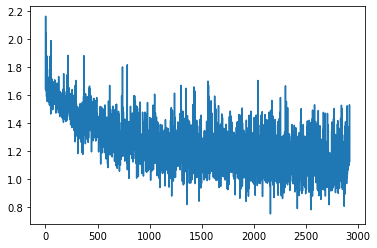

In [43]:
plt.plot(loss_trace)
plt.show()